In [1]:
import os
import sys
import struct
import pprint
import matplotlib
import matplotlib.pyplot as plt
import pickle
import math
import time
import statistics
import numpy as np
from TraceInc import AutoDict
%pylab inline

type_enum = {
   0 : "Load",
   1 : "Store"
}
pp = pprint.PrettyPrinter(indent=2)

Populating the interactive namespace from numpy and matplotlib


In [2]:
files = ['hs2d', 'hs3d','hist', 'nbody', 'path', 'bfs']

In [3]:
def create_bins(tmap):
    histogram =[]
    for sk in tmap:
        for cta in tmap[sk]:
            for sit in tmap[sk][cta]:
                for rk in tmap[sk][cta][sit]:
                    for rcta in sorted(tmap[sk][cta][sit][rk]):
                        for rit in tmap[sk][cta][sit][rk][rcta]:
                            recv = tmap[sk][cta][sit][rk][rcta][rit]
                            histogram.append(recv["size"])
    #pp.pprint(funnyMap)
    return histogram

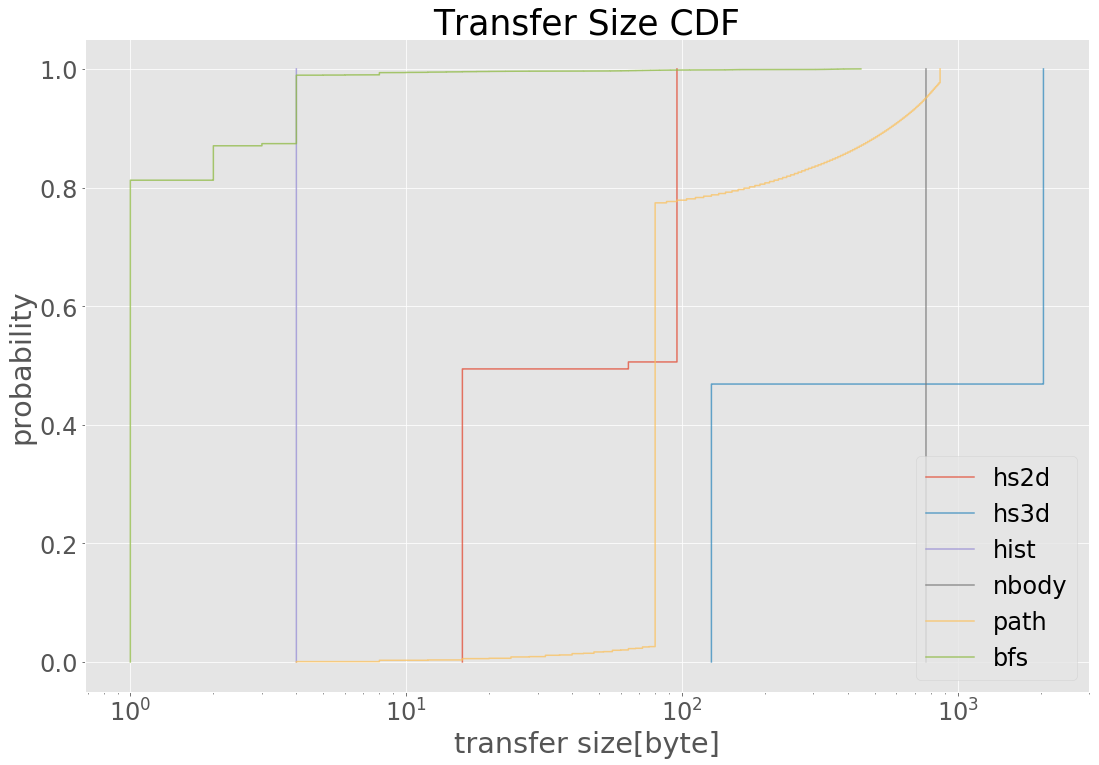

In [5]:
vols = {}
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (18, 12)
plt.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 24})
f = {}
for app in files:
    tmap = pickle.load( open('../data/'+app+'.transfermap', "rb"))
    histogram = create_bins(tmap)
    bins = np.asarray(histogram)
    sort = np.sort(bins)
    p = 1. * np.arange(len(bins))/(len(bins)-1)
    plt.step(sort, p, label=app, alpha=0.75)

plt.xlabel('transfer size[byte]')
plt.ylabel('probability')
plt.title('Transfer Size CDF')
sfile = '../plots/combined-cfd.pdf'
plt.xscale('log')
plt.legend(loc=4)
plt.savefig(sfile, papertype='a4', bbox_inches='tight', orientation='landscape')
plt.show()